# **1 Types of ML System**

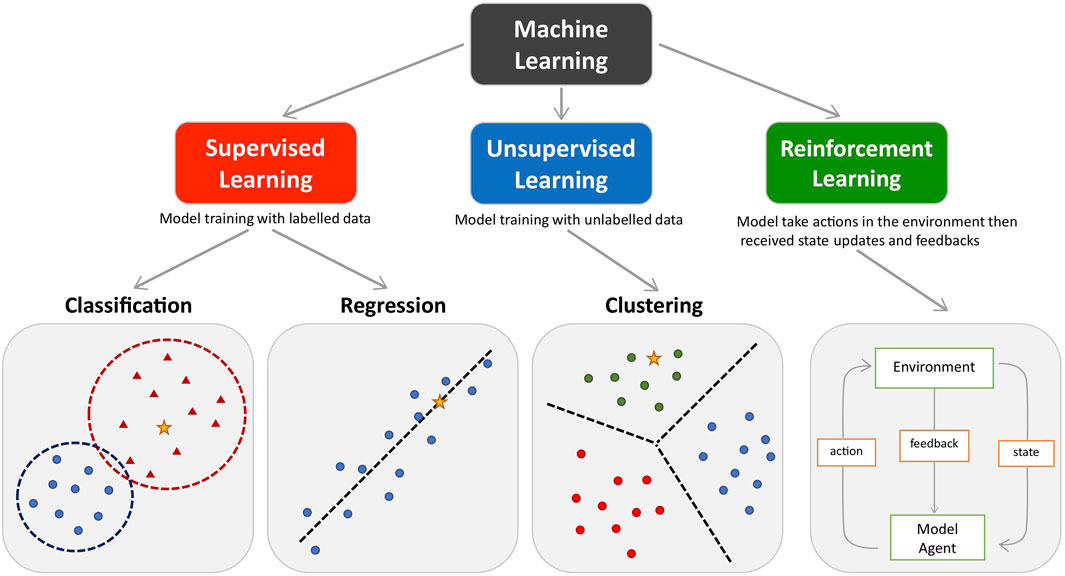

# **2 Training QSAR Models with Python**

## **2.1 Random Forest Classification Model**

We are using a simple iris dataset for the training of our example models, to focus on model buiding and training. Here we get the data first.

In [ ]:
import numpy as np
import pandas as pd

# get the data
url = 'https://github.com/pandas-dev/pandas/blob/main/pandas/tests/io/data/csv/iris.csv?raw=true'
df = pd.read_csv(url)

#print(df)

In [ ]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,0:4] # get the X (input features)
y = df.iloc[:,-1:] # get the Y (output targets)

# split the dataset into train set and test set
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=32)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# define the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)

# train the model with train set
rfc.fit(x_train,y_train)

# make prediction on the test set
y_pred = rfc.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

# Classification Model Evaluation

# Accuracy
print("The accuracy score is:", metrics.accuracy_score(y_test,y_pred))

# Classification Report including Precision, Recall and F1-score
print("\nThe classification report is: \n")
print(classification_report(y_test, y_pred))

The accuracy score is: 0.9777777777777777

The classification report is: 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45



## **2.2 Linear Regression Model**

In this example, we have a dataset including SMILES and pIC50. Our plan is to use the SMILES to calculate QSAR descriptors and use the descriptors to predict the pIC50 for all the instances.

In [ ]:
data_a = pd.read_csv("https://dp-public.oss-cn-beijing.aliyuncs.com/community/hERG.csv")
data = data_a[:1000]
print(data)

                                                SMILES  pIC50
0    Cc1ccc(CN2[C@@H]3CC[C@H]2C[C@@H](C3)Oc4cccc(c4...   9.85
1    COc1nc2ccc(Br)cc2cc1[C@@H](c3ccccc3)[C@@](O)(C...   9.70
2    NC(=O)c1cccc(O[C@@H]2C[C@H]3CC[C@@H](C2)N3CCCc...   9.60
3                         CCCCCCCc1cccc([n+]1C)CCCCCCC   9.60
4    Cc1ccc(CN2[C@@H]3CC[C@H]2C[C@@H](C3)Oc4cccc(c4...   9.59
..                                                 ...    ...
995          CCCCN([C@H]1CCNC1)S(=O)(=O)c2ccc3ccccc3c2   6.40
996        Clc1ccc(Cl)c(CN2CCN(CCN3Cc4ccccc4C3)C2=O)c1   6.40
997          c1ccnc(c12)[nH]cc2CN3CCN(CC3)c4ccc(Cl)cc4   6.40
998    Fc1ccc(Cn2c(nc3ccccc23)N4CCC(CC4)NCC5CCOCC5)cc1   6.40
999            CCNc1cc(cc(CCc2oc(CC)c(C)n2)n1)N3CCOCC3   6.40

[1000 rows x 2 columns]


In [ ]:
# Install necessary packages
!pip install -q rdkit-pypi
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs

# convert the 'SMILES' into a list
smiles_list = data['SMILES'].tolist()

# define a for loop to convert all smiles into morgan fingerprint
morgan_fps = []
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        arr = np.zeros((1,))  # Initialize a NumPy array
        DataStructs.ConvertToNumpyArray(fp, arr)  # convert the computed fp to array
        morgan_fps.append(arr)  # Add arr to our morgan_fps

# get the X and Y
X = pd.DataFrame(morgan_fps) # use the Fingerprint as the input features
Y = data['pIC50']

# split the dataset into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=32)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 48.3 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# initialize the Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=32)

# train the model
rfr.fit(X_train, Y_train)

# make prediction
Y_pred = rfr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

# Regression Model Evaluation
MAE = mean_absolute_error(Y_test,Y_pred) # MAE
MSE = mean_squared_error(Y_test,Y_pred) # MSE
RMSE = root_mean_squared_error(Y_test,Y_pred) # RMSE
R2 = r2_score(Y_test,Y_pred) # R Square

print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("R2 = ", R2)

MAE =  0.4115202849206351
MSE =  0.26940627083028496
RMSE =  0.5190436116843025
R2 =  0.5605998720374205


# **3 Model Evaluation Metrics**

## **3.1 Classification Metrics**

### **3.1.1 Confusion Matrix**

A confusion matrix is a table used to evaluate the performance of a classification model. It summarizes the number of correct and incorrect predictions made by the model, categorized by actual and predicted classes. It is a key component in computing metrics like accuracy, precision, recall, and F1 score.

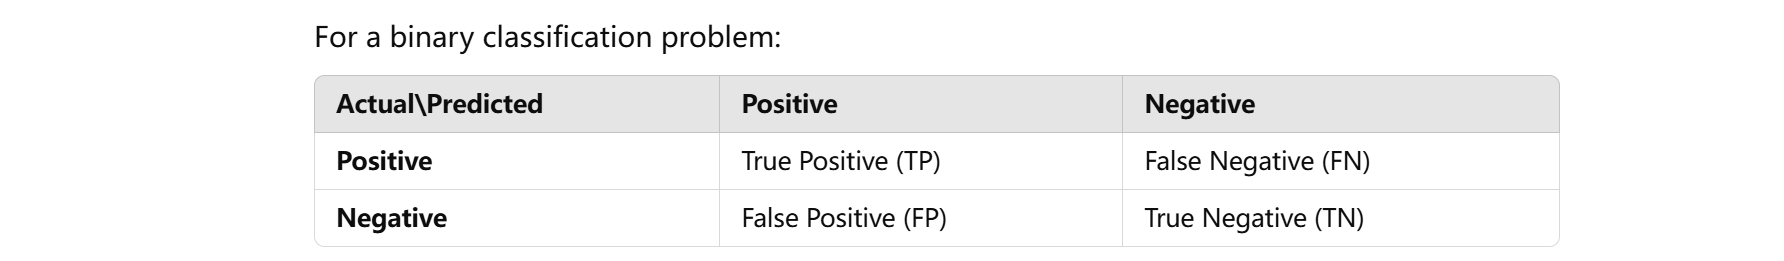

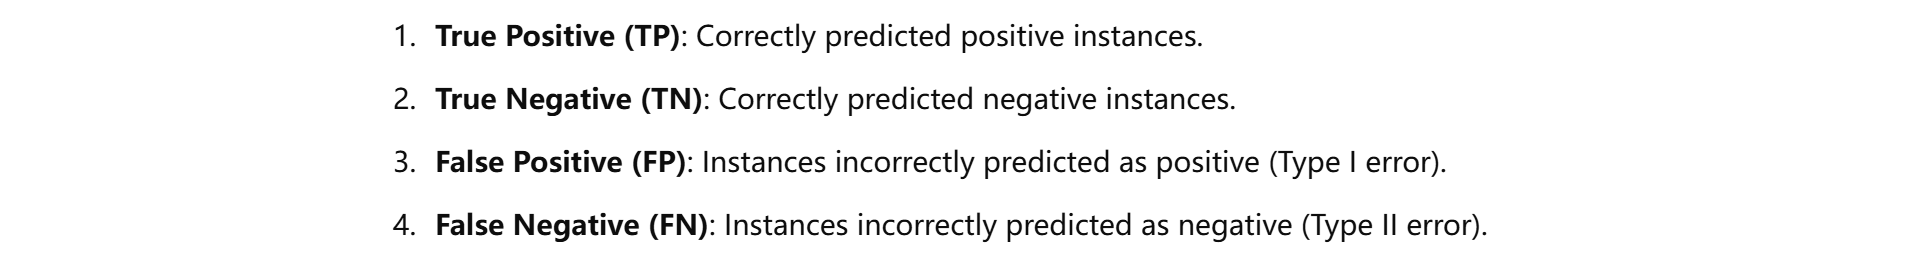

### **3.1.2 Accuracy** **(CCR)**

The accuracy score is one of the most commonly used evaluation metrics for classification tasks in machine learning. It measures the proportion of correct predictions made by a model compared to the total number of predictions. In other words, it tells you how often the model is correct.

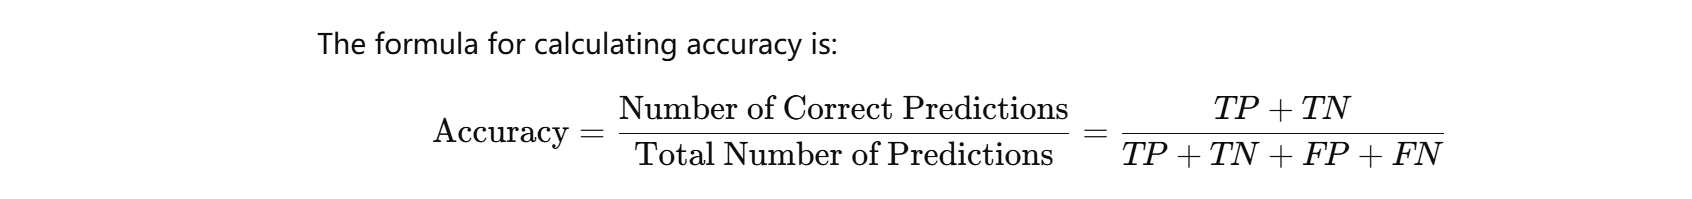

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate CCR (Accuracy)
ccr = accuracy_score(y_test, y_pred)

### **3.1.3 Precision (PPV)**

Precision is a performance metric used in classification tasks to evaluate how many of the predicted positive instances are actually positive. It is particularly important when the cost of false positives is high.
In other words, **Of all the instances the model predicted as positive, how many were actually positive?**

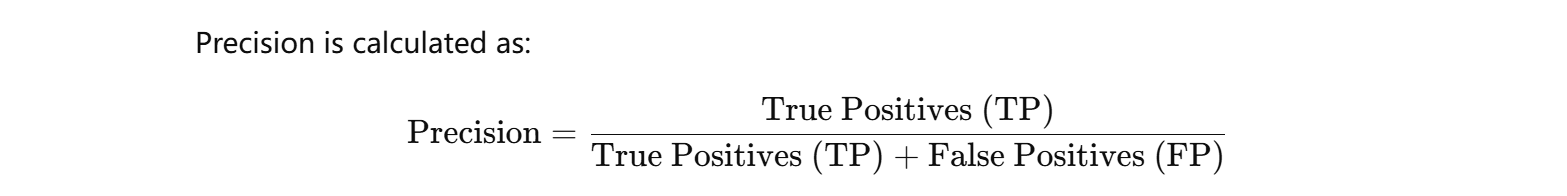

In [ ]:
from sklearn.metrics import precision_score

# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro') # change the 'average' according to binary or multi-class classification task

### **3.1.4 Recall (Sensitivity)**

Recall is a metric used to measure a classification model’s ability to correctly identify all positive instances in the dataset.


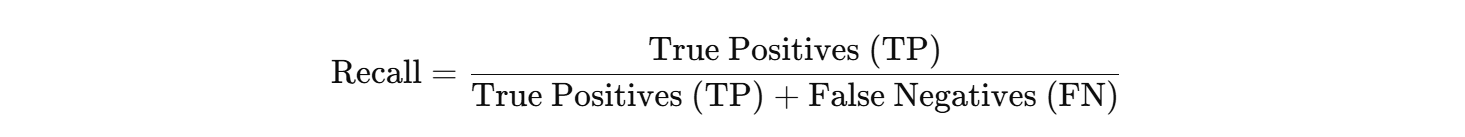

In [ ]:
from sklearn.metrics import recall_score

# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro') # change the 'average' according to binary or multi-class classification task

### **3.1.5 F1 Score**

The F1-score is a metric used to evaluate the performance of a classification model. It is the harmonic mean of precision and recall, and it provides a balanced measure that combines both metrics into a single score.

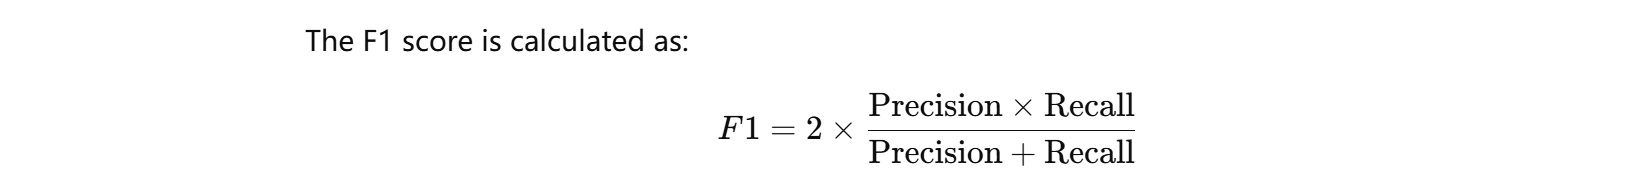

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report which including F1 score and other classification metrics
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45



## **3.2 Regression Metrics**

### **3.2.1 Mean Standard Error (MAE)**

MAE is a metric used to evaluate the accuracy of a regression model by measuring the average magnitude of the errors in a set of predictions.

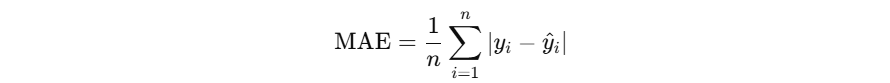

**Key Features of MAE:**


*   **Interpretability:** MAE gives a direct sense of the average error, in
the same units as the data.

*   **Robustness:** Unlike squared errors (e.g., RMSE), MAE doesn't exaggerate large errors, so it's less sensitive to outliers.

*   **Linear Scale:** MAE is linear in its error, which means that all errors are treated equally.



In [ ]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(Y_test,Y_pred)

### **3.2.2 Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)**

**MSE** is a measure of the average squared difference between the actual (true) values and the predicted values.


**Key Feature of MSE:**
*   **Penalizes larger errors:** Because the error is squared, larger errors have a disproportionate effect on the MSE, meaning MSE is more sensitive to outliers.

*   **Units:** The result is in the square of the units of the data, which can sometimes make it harder to interpret directly (for example, squared meters instead of meters).

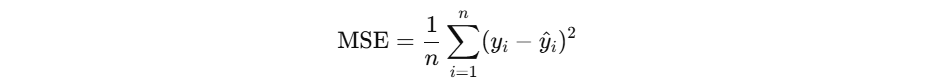

**RMSE** is the square root of the MSE. It is used to bring the error back to the original units of the data (by undoing the square from the MSE), making it more interpretable.

**Key Feature of RMSE:**
*   **Interpretability:** Since RMSE is in the same units as the original data, it is easier to interpret and compare to the actual values.

*   **Sensitive to outliers:** Like MSE, RMSE gives a higher weight to large errors, making it sensitive to outliers.

*   **Effect of squaring:** Since it takes the square root of MSE, RMSE can be seen as a more "realistic" estimate of the average error in the same scale as the data.

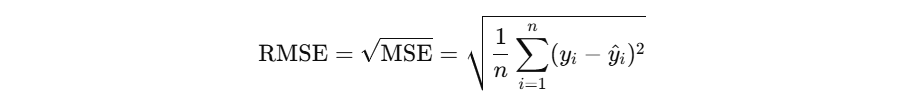

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

MSE = mean_squared_error(Y_test,Y_pred) # MSE
RMSE = root_mean_squared_error(Y_test,Y_pred) # RMSE

### **3.2.3 R Square**

**R-square** is a statistical metric used to measure the goodness of fit of a regression model. It provides an indication of how well the model's predictions approximate the true values.

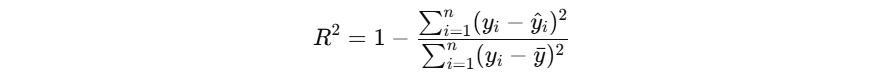

**Interpretation:**
* **R^2 = 1:** A perfect fit, meaning the model explains 100% of the variance in the data.

* **R^2 = 0:** The model explains none of the variance in the data, meaning the model is no better than just using the mean of the target variable for prediction.

In [ ]:
from sklearn.metrics import r2_score

R2 = r2_score(Y_test,Y_pred) # R Square

# **4 Save and Load the Trained Models**

Training a model may be very time-consuming, so it will save a lot of time if we can save the trained model and load it when we need. However, saving a model have many methods, depending on the types of the models.

## **4.1 Scikit-Learn Models**

In [ ]:
import pickle

In [ ]:
# save the model
with open('new_model.pkl', 'wb') as f:
  pickle.dump(rfc,f) # the random forest model we have already trained above

Now, we have successfully saved the trained model "rfc" into a file named "model.pkl". We can see it in the filelist on the left of this page.

Then, we can also load it out into a new model as we named "loaded_model".

In [ ]:
# load the model
with open('new_model.pkl', 'rb') as f:
  loaded_model = pickle.load(f)

In [ ]:
# use the loaded model to make predictions
y_pred_new = loaded_model.predict(x_test)

## **4.2 Tensorflow Keras Models**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# prepare dataset
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_y = train_y[:1000]
test_y = test_y[:1000]

train_x = train_x[:1000].reshape(-1, 28 * 28) / 255.0
test_x = test_x[:1000].reshape(-1, 28 * 28) / 255.0

In [ ]:
# build and train a simple sequential model

def create_model():
  model = tf.keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  return model

model = create_model()
model.fit(train_x, train_y, epochs=5)

Now, we have built and trained a model named "model". Let's try to save it.

In [ ]:
# Save the model as a `.keras` zip archive.
model.save('new_model.keras')

We can load the model when we need.

In [ ]:
# Load the model
new_model = tf.keras.models.load_model('new_model.keras')

# check the loaded model
new_model.summary()